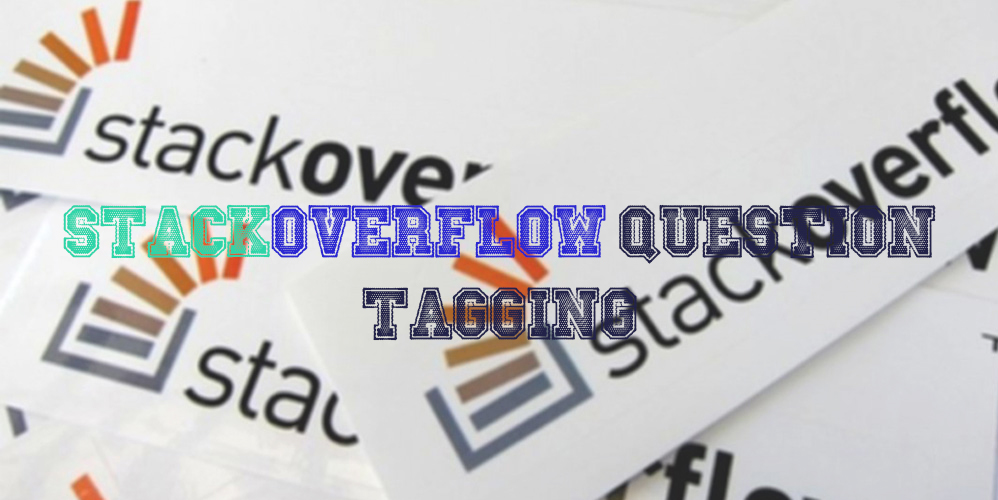

# Stack Overflow: Tag Prediction

<h1>1. Business Problem </h1>

<h2> 1.1 Description </h2>

<p style='font-size:18px'><b> Description </b></p>
<p>
Stack Overflow is the largest, most trusted online community for developers to learn, share their programming knowledge, and build their careers.<br />
<br />
Stack Overflow is something which every programmer use one way or another. Each month, over 50 million developers come to Stack Overflow to learn, share their knowledge, and build their careers. It features questions and answers on a wide range of topics in computer programming. The website serves as a platform for users to ask and answer questions, and, through membership and active participation, to vote questions and answers up or down and edit questions and answers in a fashion similar to a wiki or Digg. As of April 2014 Stack Overflow has over 4,000,000 registered users, and it exceeded 10,000,000 questions in late August 2015. Based on the type of tags assigned to questions, the top eight most discussed topics on the site are: Java, JavaScript, C#, PHP, Android, jQuery, Python and HTML.<br />
<br />
</p>

<p style='font-size:18px'><b> Problem Statemtent </b></p>
Suggest the tags based on the content that was there in the question posted on Stackoverflow.

<p style='font-size:18px'><b> Source:  </b> https://www.kaggle.com/c/facebook-recruiting-iii-keyword-extraction/</p>


<h2> 1.2 Source / useful links </h2>

Data Source : https://www.kaggle.com/c/facebook-recruiting-iii-keyword-extraction/data <br>
Youtube : https://youtu.be/nNDqbUhtIRg <br>
Research paper : https://www.microsoft.com/en-us/research/wp-content/uploads/2016/02/tagging-1.pdf <br>
Research paper : https://dl.acm.org/citation.cfm?id=2660970&dl=ACM&coll=DL

<h2> 1.3 Real World / Business Objectives and Constraints </h2>

1. For the given Questions and its descriptions, Predict as many tags as possible with high precision and recall. 
2. Precision is we have to be very sure that the tag is for that particular question and recall means if the tag is suppose to be present then it should be present most of the times 
3. Incorrect tags could impact customer experience on StackOverflow.
4. If a incorrect tag is predicted, then the precision decreases and if any correct tag is missed then recall decreases. This impacts customer experience badly.
5. No strict latency constraints.


<h1>2. Machine Learning problem </h1>

<h2> 2.1 Data </h2>

<h3> 2.1.1 Data Overview </h3>

<b>Refer</b>: https://www.kaggle.com/c/facebook-recruiting-iii-keyword-extraction/data

All of the data is in 2 files: Train and Test.

  1. <b>Train.csv</b> contains 4 columns: Id,Title,Body,Tags.
  

  2. <b>Test.csv</b> contains the same columns but without the Tags, which you are to predict.
  

  3. <b>Size of Train.csv</b> - 6.75GB (after unzipping)
  
 
  4. <b>Size of Test.csv</b> - 2GB
  

  5. <b>Number of rows in Train.csv</b> = 6034195
  

The questions are randomized and contains a mix of verbose text sites as well as sites related to math and programming. The number of questions from each site may vary, and no filtering has been performed on the questions (such as closed questions).



#### Data Field Explaination

Dataset contains 6,034,195 rows. The columns in the table are:

1. <b>Id</b> - Unique identifier for each question


2. <b>Title</b> - The question's title


3. <b>Body</b> - The body of the question


4. <b>Tags</b> - The tags associated with the question in a space-seperated format (all lowercase, should not contain tabs '\t' or ampersands '&')



<h3>2.1.2 Example Data point </h3>

<pre>
<b>Title</b>:  Implementing Boundary Value Analysis of Software Testing in a C++ program?
<b>Body </b>: <pre><code>
        #include&lt;
        iostream&gt;\n
        #include&lt;
        stdlib.h&gt;\n\n
        using namespace std;\n\n
        int main()\n
        {\n
                 int n,a[n],x,c,u[n],m[n],e[n][4];\n         
                 cout&lt;&lt;"Enter the number of variables";\n         cin&gt;&gt;n;\n\n         
                 cout&lt;&lt;"Enter the Lower, and Upper Limits of the variables";\n         
                 for(int y=1; y&lt;n+1; y++)\n         
                 {\n                 
                    cin&gt;&gt;m[y];\n                 
                    cin&gt;&gt;u[y];\n         
                 }\n         
                 for(x=1; x&lt;n+1; x++)\n         
                 {\n                 
                    a[x] = (m[x] + u[x])/2;\n         
                 }\n         
                 c=(n*4)-4;\n         
                 for(int a1=1; a1&lt;n+1; a1++)\n         
                 {\n\n             
                    e[a1][0] = m[a1];\n             
                    e[a1][1] = m[a1]+1;\n             
                    e[a1][2] = u[a1]-1;\n             
                    e[a1][3] = u[a1];\n         
                 }\n         
                 for(int i=1; i&lt;n+1; i++)\n         
                 {\n            
                    for(int l=1; l&lt;=i; l++)\n            
                    {\n                 
                        if(l!=1)\n                 
                        {\n                    
                            cout&lt;&lt;a[l]&lt;&lt;"\\t";\n                 
                        }\n            
                    }\n            
                    for(int j=0; j&lt;4; j++)\n            
                    {\n                
                        cout&lt;&lt;e[i][j];\n                
                        for(int k=0; k&lt;n-(i+1); k++)\n                
                        {\n                    
                            cout&lt;&lt;a[k]&lt;&lt;"\\t";\n               
                        }\n                
                        cout&lt;&lt;"\\n";\n            
                    }\n        
                 }    \n\n        
                 system("PAUSE");\n        
                 return 0;    \n
        }\n
        </code></pre>\n\n
        <p>The answer should come in the form of a table like</p>\n\n
        <pre><code>       
        1            50              50\n       
        2            50              50\n       
        99           50              50\n       
        100          50              50\n       
        50           1               50\n       
        50           2               50\n       
        50           99              50\n       
        50           100             50\n       
        50           50              1\n       
        50           50              2\n       
        50           50              99\n       
        50           50              100\n
        </code></pre>\n\n
        <p>if the no of inputs is 3 and their ranges are\n
        1,100\n
        1,100\n
        1,100\n
        (could be varied too)</p>\n\n
        <p>The output is not coming,can anyone correct the code or tell me what\'s wrong?</p>\n'
<b>Tags </b>: 'c++ c'
</pre>

<h2>2.2 Mapping the real-world problem to a Machine Learning Problem </h2>

<h3> 2.2.1 Type of Machine Learning Problem </h3>


1. This Stack-overflow problem is multi-label classification problem, where each question have multiple labels/tags/classes.

<b>Multi-label Classification</b>: Multilabel classification assigns to each sample a set of target labels. This can be thought as predicting properties of a data-point that are not mutually exclusive, such as topics that are relevant for a document. A question on Stackoverflow might be about any of C, Pointers, FileIO and/or memory-management at the same time or none of these.

2. In binary classification and multi-class classification we only have one label for each Xi. When we have multiple labels for a given Xi then it multi-label classification problem. 

<b>Credit</b>: http://scikit-learn.org/stable/modules/multiclass.html

<h2>2.2.2 Performance metric </h2>

### F1-score, Micro-averaged F1-score, Macro averaged F1-score

<b>F1-score</b>:- The F1 score can be interpreted as a weighted average of the precision and recall. To get both high precision and high recall, we can use F1-score which is a geometric mean of both precision and recall.
where an F1 score reaches its best value at 1 and worst score at 0.

For F1-score minimum value is 0 and best value is 1.

1. The relative contribution of precision and recall to the F1 score are equal. The formula for the F1 score is:

2. F1 = 2 (precision * recall) / (precision + recall) . This is for binary classification.

3. Precision = True positives / True positives + False positives

4. Recall = True positives / True positives + False Negatives.

In multi-label classification we can modify F1-score into 2 types

a. Micro-averaged F1-score. It is more popular

b. Macro averaged F1-score

<b>Micro-Averaged F1-Score (Mean F Score)</b> :- This is the weighted average of the F1 score of each class.
1. Here weightage is given based on how frequently a label occurs. 
2. It takes tag/label frequency of occurance into consideration when computing micro precision and micro recall. 
3. Here we take individual TP, FP, FN, so we get weighted average of these and we get weighted F1-score.
4. Calculate metrics globally by counting the total true positives, false negatives and false positives. 
5. This is a better metric when we have class imbalance. 

<b>Macro f1 score</b>:- 
1. Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account. 
2. It takes simple average of F1 scores of all labels/tags. 
3. It doesn't take frequency of occurance of a tag into consideration. This is non-weighted, simple F1-score.

If we have a case where some tags occurs many times and some tags occurs very less times, then it is good to use micro averaged F1-score , not macro averaged F1-score. 

##### Reference:- 
https://www.kaggle.com/wiki/MeanFScore

http://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html

<b>Hamming loss</b> : The Hamming loss is the fraction of labels that are incorrectly predicted.
If the actual labels and predicted labels differ more, then the error also increases. This is Hamming loss.

https://www.kaggle.com/wiki/HammingLoss



## Loading all Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import sqlite3
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from wordcloud import WordCloud
import re
import os
from sqlalchemy import create_engine # database connection
import datetime as dt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn import metrics
from sklearn.metrics import f1_score,precision_score,recall_score
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from skmultilearn.adapt import mlknn
from skmultilearn.problem_transform import ClassifierChain
from skmultilearn.problem_transform import BinaryRelevance
from skmultilearn.problem_transform import LabelPowerset
from sklearn.naive_bayes import GaussianNB
from datetime import datetime

<h1> 3. Exploratory Data Analysis </h1>

<h2> 3.1 Data Loading and Cleaning </h2>

<h3>3.1.1 Using Pandas with SQLite to Load the data</h3>

In [2]:
#Creating db file from csv
#Learn SQL: https://www.w3schools.com/sql/default.asp
if not os.path.isfile('train.db'):
    start = datetime.now()
    disk_engine = create_engine('sqlite:///train.db')
    start = dt.datetime.now()
    chunksize = 180000  
    j = 0
    index_start = 1
    for df in pd.read_csv('Train.csv', names=['Id', 'Title', 'Body', 'Tags'], chunksize=chunksize, iterator=True, encoding='utf-8', ):
        df.index += index_start
        j+=1
        print('{} rows'.format(j*chunksize))
        df.to_sql('data', disk_engine, if_exists='append')
        index_start = df.index[-1] + 1
    print("Time taken to run this cell :", datetime.now() - start)

<h3> 3.1.2 Counting the number of rows </h3>

In [3]:
if os.path.isfile('train.db'):
    start = datetime.now()
    # connecting to the database train.db . This is opening the database
    con = sqlite3.connect('train.db')
    # run SQL query to get number of rows in database table
    num_rows = pd.read_sql_query("""SELECT count(*) FROM data""", con)
    #Always remember to close the database
    print("Number of rows in the database :","\n",num_rows['count(*)'].values[0])
    con.close()
    print("Time taken to count the number of rows :", datetime.now() - start)
else:
    print("Please download the train.db file from drive or run the above cell to genarate train.db file")

Number of rows in the database : 
 6034196
Time taken to count the number of rows : 0:01:37.418065


<h3>3.1.3 Checking for duplicates </h3>

In [4]:
#Learn SQl: https://www.w3schools.com/sql/default.asp
if os.path.isfile('train.db'):
    start = datetime.now()
    # opening the database
    con = sqlite3.connect('train.db')
    # This query returns set of all the duplicates in the database , number of times each duplicate occurs and this data 
    # is stored into df_no_dup. 
    df_no_dup = pd.read_sql_query('SELECT Title, Body, Tags, COUNT(*) as cnt_dup FROM data GROUP BY Title, Body, Tags', con)
    # Closing the connection
    con.close()
    print("Time taken to run this cell :", datetime.now() - start)
else:
    print("Please download the train.db file from drive or run the first to genarate train.db file")

Time taken to run this cell : 0:02:49.075469


In [5]:
df_no_dup.head()
# we can observe that there are duplicates

,Title,Body,Tags,cnt_dup
0,Implementing Boundary Value Analysis of S...,<pre><code>#include&lt;iostream&gt;\n#include&...,c++ c,1
1,Dynamic Datagrid Binding in Silverlight?,<p>I should do binding for datagrid dynamicall...,c# silverlight data-binding,1
2,Dynamic Datagrid Binding in Silverlight?,<p>I should do binding for datagrid dynamicall...,c# silverlight data-binding columns,1
3,java.lang.NoClassDefFoundError: javax/serv...,"<p>I followed the guide in <a href=""http://sta...",jsp jstl,1
4,java.sql.SQLException:[Microsoft][ODBC Dri...,<p>I use the following code</p>\n\n<pre><code>...,java jdbc,2


In [6]:
print("number of duplicate questions :", num_rows['count(*)'].values[0]- df_no_dup.shape[0], "(",(1-((df_no_dup.shape[0])/(num_rows['count(*)'].values[0])))*100,"% )")

number of duplicate questions : 1827881 ( 30.292038906260256 % )


In [7]:
# number of times each question appeared in our database
df_no_dup.cnt_dup.value_counts()

1    2656284
2    1272336
3     277575
4         90
5         25
6          5
Name: cnt_dup, dtype: int64

In [8]:
#checking for null values
nan_rows = df_no_dup[df_no_dup.isnull().any(1)]
nan_rows

,Title,Body,Tags,cnt_dup
777547,Do we really need NULL?,<blockquote>\n <p><strong>Possible Duplicate:...,None,1
962680,Find all values that are not null and not in a...,<p>I am running into a problem which results i...,None,1
1126558,Handle NullObjects,<p>I have done quite a bit of research on best...,None,1
1256102,How do Germans call null,"<p>In german null means 0, so how do they call...",None,1
2430668,Page cannot be null. Please ensure that this o...,<p>I get this error when i remove dynamically ...,None,1
3329908,"What is the difference between NULL and ""0""?","<p>What is the difference from NULL and ""0""?</...",None,1
3551595,a bit of difference between null and space,<p>I was just reading this quote</p>\n\n<block...,None,2


In [9]:
# droping the rows contain null value
df_no_dup.dropna(inplace=True)

In [10]:
# checking the tag count for each title and body before removing them

start = datetime.now()
df_no_dup["tag_count"] = df_no_dup["Tags"].apply(lambda text: len(text.split(" ")))
# adding a new feature number of tags per question
print("Time taken to run this cell :", datetime.now() - start)
df_no_dup.head()

Time taken to run this cell : 0:00:03.259207


,Title,Body,Tags,cnt_dup,tag_count
0,Implementing Boundary Value Analysis of S...,<pre><code>#include&lt;iostream&gt;\n#include&...,c++ c,1,2
1,Dynamic Datagrid Binding in Silverlight?,<p>I should do binding for datagrid dynamicall...,c# silverlight data-binding,1,3
2,Dynamic Datagrid Binding in Silverlight?,<p>I should do binding for datagrid dynamicall...,c# silverlight data-binding columns,1,4
3,java.lang.NoClassDefFoundError: javax/serv...,"<p>I followed the guide in <a href=""http://sta...",jsp jstl,1,2
4,java.sql.SQLException:[Microsoft][ODBC Dri...,<p>I use the following code</p>\n\n<pre><code>...,java jdbc,2,2


In [11]:
# distribution of number of tags per question
df_no_dup.tag_count.value_counts()

3    1206157
2    1111706
4     814996
1     568291
5     505158
Name: tag_count, dtype: int64

In [12]:
#Creating a new database with no duplicates / after removing duplicates 
# train_no_dup  -- train database with no duplicates . There are only non duplicate rows in this database

if not os.path.isfile('train_no_dup.db'):
    disk_dup = create_engine("sqlite:///train_no_dup.db")
    no_dup = pd.DataFrame(df_no_dup, columns=['Title', 'Body', 'Tags'])
    no_dup.to_sql('no_dup_train',disk_dup)

In [13]:
#This method seems more appropriate to work with this much data.
#creating the connection with database file.

if os.path.isfile('train_no_dup.db'):
    start = datetime.now()
    con = sqlite3.connect('train_no_dup.db')
    tag_data = pd.read_sql_query("""SELECT Tags FROM no_dup_train""", con)
    #Always remember to close the database
    con.close()

    # Let's now drop unwanted column.
    tag_data.drop(tag_data.index[0], inplace=True)
    #Printing first 5 columns from our data frame
    tag_data.head()
    print("Time taken to run this cell :", datetime.now() - start)
else:
    print("Please download the train.db file from drive or run the above cells to genarate train.db file")

Time taken to run this cell : 0:00:50.498138


<h2> 3.2 Analysis of Tags </h2>

<h3> 3.2.1 Total number of unique tags </h3>

In [14]:
# Importing & Initializing the "CountVectorizer" object, which 
#is scikit-learn's bag of words tool.

#by default 'split()' will tokenize each tag using space.
vectorizer = CountVectorizer(tokenizer = lambda x: x.split())
# fit_transform() does two functions: First, it fits the model
# and learns the vocabulary; second, it transforms our training data
# into feature vectors. The input to fit_transform should be a list of strings.
tag_dtm = vectorizer.fit_transform(tag_data['Tags'])

In [15]:
print("Number of data points :", tag_dtm.shape[0])
print("Number of unique tags :", tag_dtm.shape[1])

Number of data points : 4206307
Number of unique tags : 42048


In [16]:
#'get_feature_name()' gives us the vocabulary.
tags = vectorizer.get_feature_names()
#Lets look at the tags we have.
print("Some of the tags we have :", tags[:10])

Some of the tags we have : ['.a', '.app', '.asp.net-mvc', '.aspxauth', '.bash-profile', '.class-file', '.cs-file', '.doc', '.drv', '.ds-store']


<h3> 3.2.3 Number of times a tag appeared </h3>

In [17]:
# https://stackoverflow.com/questions/15115765/how-to-access-sparse-matrix-elements
#Lets now store the document term matrix in a dictionary.
freqs = tag_dtm.sum(axis=0).A1
result = dict(zip(tags, freqs))

In [18]:
#Saving this dictionary to csv files.
if not os.path.isfile('tag_counts_dict_dtm.csv'):
    with open('tag_counts_dict_dtm.csv', 'w') as csv_file:
        writer = csv.writer(csv_file)
        for key, value in result.items():
            writer.writerow([key, value])
tag_df = pd.read_csv("tag_counts_dict_dtm.csv", names=['Tags', 'Counts'])
tag_df.head()

,Tags,Counts
0,paintbox,4
1,invoke-command,29
2,findbugs,248
3,cooking,15
4,netbeans-plugins,121


In [19]:
# Sort the tags in descending order of number of times it occurs 

tag_df_sorted = tag_df.sort_values(['Counts'], ascending=False)
tag_counts = tag_df_sorted['Counts'].values

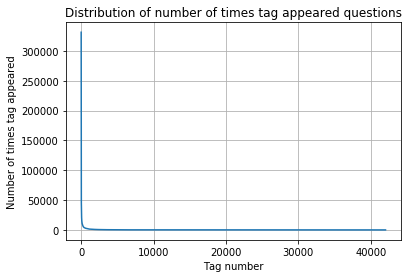

In [20]:
plt.plot(tag_counts)
plt.title("Distribution of number of times tag appeared questions")
plt.grid()
plt.xlabel("Tag number")
plt.ylabel("Number of times tag appeared")
plt.show()

#### Observation :-

This is highly skewed distribution , as we want to zoom in and see results clearly , taking first 10000 points in the plot below.

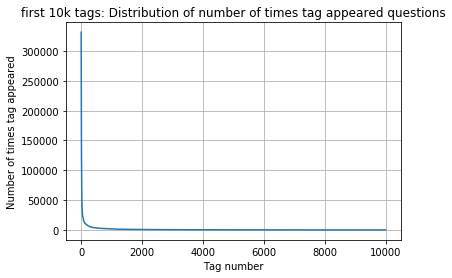

400 [331505  44829  22429  17728  13364  11162  10029   9148   8054   7151
   6466   5865   5370   4983   4526   4281   4144   3929   3750   3593
   3453   3299   3123   2986   2891   2738   2647   2527   2431   2331
   2259   2186   2097   2020   1959   1900   1828   1770   1723   1673
   1631   1574   1532   1479   1448   1406   1365   1328   1300   1266
   1245   1222   1197   1181   1158   1139   1121   1101   1076   1056
   1038   1023   1006    983    966    952    938    926    911    891
    882    869    856    841    830    816    804    789    779    770
    752    743    733    725    712    702    688    678    671    658
    650    643    634    627    616    607    598    589    583    577
    568    559    552    545    540    533    526    518    512    506
    500    495    490    485    480    477    469    465    457    450
    447    442    437    432    426    422    418    413    408    403
    398    393    388    385    381    378    374    370    367    365
  

In [21]:
plt.plot(tag_counts[0:10000])
plt.title('first 10k tags: Distribution of number of times tag appeared questions')
plt.grid()
plt.xlabel("Tag number")
plt.ylabel("Number of times tag appeared")
plt.show()
print(len(tag_counts[0:10000:25]), tag_counts[0:10000:25])

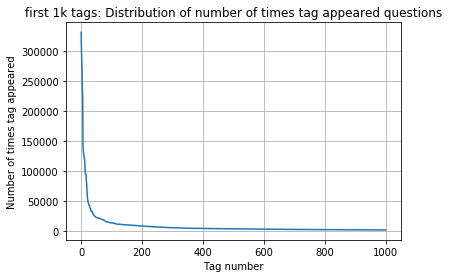

200 [331505 221533 122769  95160  62023  44829  37170  31897  26925  24537
  22429  21820  20957  19758  18905  17728  15533  15097  14884  13703
  13364  13157  12407  11658  11228  11162  10863  10600  10350  10224
  10029   9884   9719   9411   9252   9148   9040   8617   8361   8163
   8054   7867   7702   7564   7274   7151   7052   6847   6656   6553
   6466   6291   6183   6093   5971   5865   5760   5577   5490   5411
   5370   5283   5207   5107   5066   4983   4891   4785   4658   4549
   4526   4487   4429   4335   4310   4281   4239   4228   4195   4159
   4144   4088   4050   4002   3957   3929   3874   3849   3818   3797
   3750   3703   3685   3658   3615   3593   3564   3521   3505   3483
   3453   3427   3396   3363   3326   3299   3272   3232   3196   3168
   3123   3094   3073   3050   3012   2986   2983   2953   2934   2903
   2891   2844   2819   2784   2754   2738   2726   2708   2681   2669
   2647   2621   2604   2594   2556   2527   2510   2482   2460   2444
  

In [22]:
# first 1000 tags

plt.plot(tag_counts[0:1000])
plt.title('first 1k tags: Distribution of number of times tag appeared questions')
plt.grid()
plt.xlabel("Tag number")
plt.ylabel("Number of times tag appeared")
plt.show()
print(len(tag_counts[0:1000:5]), tag_counts[0:1000:5])

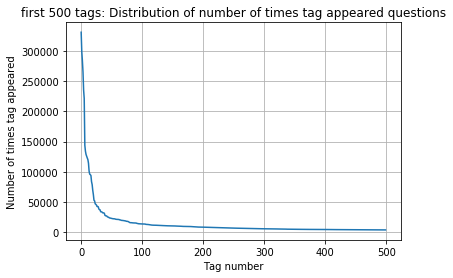

100 [331505 221533 122769  95160  62023  44829  37170  31897  26925  24537
  22429  21820  20957  19758  18905  17728  15533  15097  14884  13703
  13364  13157  12407  11658  11228  11162  10863  10600  10350  10224
  10029   9884   9719   9411   9252   9148   9040   8617   8361   8163
   8054   7867   7702   7564   7274   7151   7052   6847   6656   6553
   6466   6291   6183   6093   5971   5865   5760   5577   5490   5411
   5370   5283   5207   5107   5066   4983   4891   4785   4658   4549
   4526   4487   4429   4335   4310   4281   4239   4228   4195   4159
   4144   4088   4050   4002   3957   3929   3874   3849   3818   3797
   3750   3703   3685   3658   3615   3593   3564   3521   3505   3483]


In [23]:
# top 500 tags

plt.plot(tag_counts[0:500])
plt.title('first 500 tags: Distribution of number of times tag appeared questions')
plt.grid()
plt.xlabel("Tag number")
plt.ylabel("Number of times tag appeared")
plt.show()
print(len(tag_counts[0:500:5]), tag_counts[0:500:5])

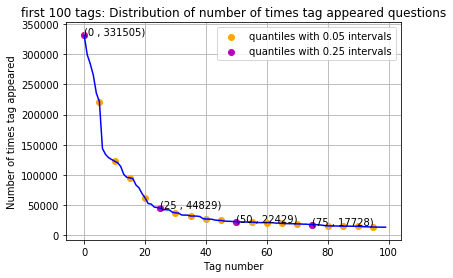

20 [331505 221533 122769  95160  62023  44829  37170  31897  26925  24537
  22429  21820  20957  19758  18905  17728  15533  15097  14884  13703]


In [24]:
plt.plot(tag_counts[0:100], c='b')
plt.scatter(x=list(range(0,100,5)), y=tag_counts[0:100:5], c='orange', label="quantiles with 0.05 intervals")
# quantiles with 0.25 difference
plt.scatter(x=list(range(0,100,25)), y=tag_counts[0:100:25], c='m', label = "quantiles with 0.25 intervals")

for x,y in zip(list(range(0,100,25)), tag_counts[0:100:25]):
    plt.annotate(s="({} , {})".format(x,y), xy=(x,y), xytext=(x-0.05, y+500))

plt.title('first 100 tags: Distribution of number of times tag appeared questions')
plt.grid()
plt.xlabel("Tag number")
plt.ylabel("Number of times tag appeared")
plt.legend()
plt.show()
print(len(tag_counts[0:100:5]), tag_counts[0:100:5])

In [20]:
# Store tags greater than 10K in one list
lst_tags_gt_10k = tag_df[tag_df.Counts>10000].Tags
#Print the length of the list
print ('{} Tags are used more than 10000 times'.format(len(lst_tags_gt_10k)))
# Store tags greater than 100K in one list
lst_tags_gt_100k = tag_df[tag_df.Counts>100000].Tags
#Print the length of the list.
print ('{} Tags are used more than 100000 times'.format(len(lst_tags_gt_100k)))

153 Tags are used more than 10000 times
14 Tags are used more than 100000 times


<b>Observations:</b><br />
1. There are total 153 tags which are used more than 10000 times.
2. 14 tags are used more than 100000 times.
3. Most frequent tag (i.e. c#) is used 331505 times.
4. Since some tags occur much more frequenctly than others, Micro-averaged F1-score is the appropriate metric for this probelm.

<h3> 3.2.4 Tags Per Question </h3>

In [21]:
#Storing the count of tag in each question in list 'tag_count'
tag_quest_count = tag_dtm.sum(axis=1).tolist()
#Converting list of lists into single list, we will get [[3], [4], [2], [2], [3]] and we are converting this to [3, 4, 2, 2, 3]
tag_quest_count=[int(j) for i in tag_quest_count for j in i]
print ('We have total {} datapoints.'.format(len(tag_quest_count)))

print(tag_quest_count[:5])

We have total 4206307 datapoints.
[3, 4, 2, 2, 3]


In [22]:
print( "Maximum number of tags per question: %d"%max(tag_quest_count))
print( "Minimum number of tags per question: %d"%min(tag_quest_count))
print( "Avg. number of tags per question: %f"% ((sum(tag_quest_count)*1.0)/len(tag_quest_count)))

Maximum number of tags per question: 5
Minimum number of tags per question: 1
Avg. number of tags per question: 2.899443


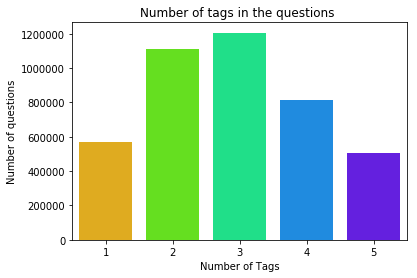

In [67]:
sns.countplot(tag_quest_count, palette='gist_rainbow')
plt.title("Number of tags in the questions ")
plt.xlabel("Number of Tags")
plt.ylabel("Number of questions")
plt.show()

<b>Observations:</b><br />
1. Maximum number of tags per question: 5
2. Minimum number of tags per question: 1
3. Avg. number of tags per question: 2.899
4. Most of the questions are having 2 or 3 tags

<h3>3.2.5 Most Frequent Tags </h3>

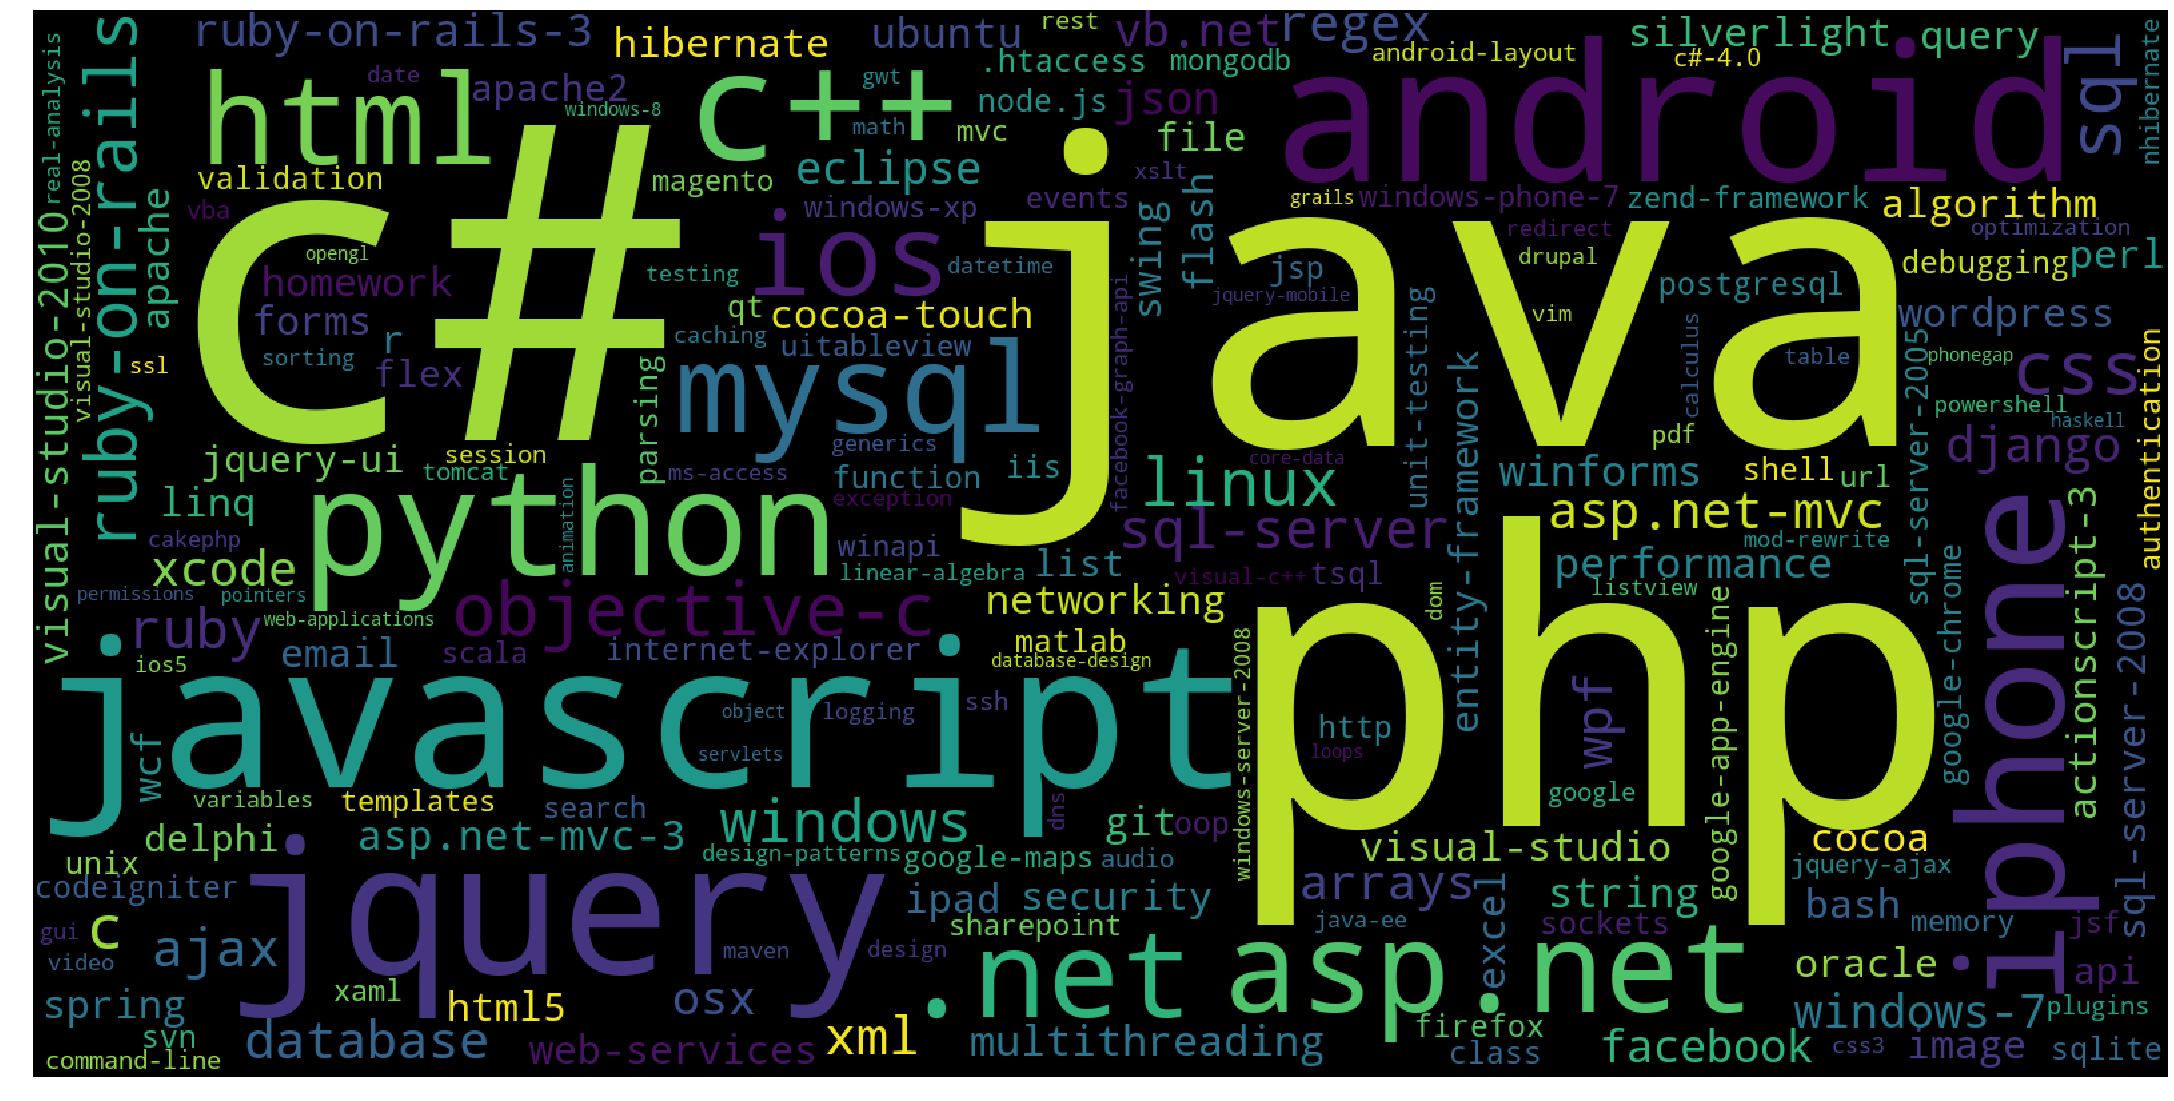

Time taken to run this cell : 0:00:05.177463


In [30]:
# Ploting word cloud
start = datetime.now()

# Lets first convert the 'result' dictionary to 'list of tuples'
tup = dict(result.items())
#Initializing WordCloud using frequencies of tags.
wordcloud = WordCloud(    background_color='black',
                          width=1600,
                          height=800,
                    ).generate_from_frequencies(tup)

fig = plt.figure(figsize=(30,20))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
fig.savefig("tag.png")
plt.show()
print("Time taken to run this cell :", datetime.now() - start)

<b>Observations:</b><br />
A look at the word cloud shows that "c#", "java", "php", "asp.net", "javascript", "c++" are some of the most frequent tags.

<h3> 3.2.6 The top 20 tags </h3>

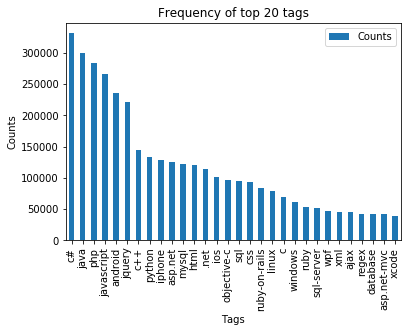

In [28]:
i=np.arange(30)
tag_df_sorted.head(30).plot(kind='bar')
plt.title('Frequency of top 20 tags')
plt.xticks(i, tag_df_sorted['Tags'])
plt.xlabel('Tags')
plt.ylabel('Counts')
plt.show()

<b>Observations:</b><br />
1. Majority of the most frequent tags are programming language.
2. C# is the top most frequent programming language.
3. Android, IOS, Linux and windows are among the top most frequent operating systems.

<h3> 3.3 Cleaning and preprocessing of Questions </h3>

<h3> 3.3.1 Preprocessing </h3>

<ol> 
    <li> Sample 0.5M data points </li>
    <li> Separate out code-snippets from Body </li>
    <li> Remove Spcial characters from Question title and description (not in code)</li>
    <li> Remove stop words (Except 'C') </li>
    <li> Remove HTML Tags </li>
    <li> Convert all the characters into small letters </li>
    <li> Use SnowballStemmer to stem the words </li>
</ol>

In [23]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     /home/pavana_paradesi5/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [24]:
def striphtml(data):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', str(data))
    return cleantext
stop_words = set(stopwords.words('english'))
stemmer = SnowballStemmer("english")

In [25]:
#http://www.sqlitetutorial.net/sqlite-python/create-tables/
def create_connection(db_file):
    """ create a database connection to the SQLite database
        specified by db_file
    :param db_file: database file
    :return: Connection object or None
    """
    try:
        conn = sqlite3.connect(db_file)
        return conn
    except Error as e:
        print(e)
 
    return None

def create_table(conn, create_table_sql):
    """ create a table from the create_table_sql statement
    :param conn: Connection object
    :param create_table_sql: a CREATE TABLE statement
    :return:
    """
    try:
        c = conn.cursor()
        c.execute(create_table_sql)
    except Error as e:
        print(e)
        
def checkTableExists(dbcon):
    cursr = dbcon.cursor()
    str = "select name from sqlite_master where type='table'"
    table_names = cursr.execute(str)
    print("Tables in the databse:")
    tables =table_names.fetchall() 
    print(tables[0][0])
    return(len(tables))

def create_database_table(database, query):
    conn = create_connection(database)
    if conn is not None:
        create_table(conn, query)
        checkTableExists(conn)
    else:
        print("Error! cannot create the database connection.")
    conn.close()

sql_create_table = """CREATE TABLE IF NOT EXISTS QuestionsProcessed (question text NOT NULL, code text, tags text, words_pre integer, words_post integer, is_code integer);"""
create_database_table("Processed.db", sql_create_table)

Tables in the databse:
QuestionsProcessed


### Modeling with less data points (0.2M data points) and more weight to title and 500 tags only. 

So performing some hacks like:

#### Reducing 1 million data to 0.2 million data due to computational issues 

1. Instead of using 5500 tags, we are taking 500 tags. as even 500 tags also covers 90% of questions.
2. As we have title and body text, the title has text with lot of meaning put in just some words/text. So we are giving more weightage of 3 times more to the text in title and keep the weightage for text in body as it is. Title plays an important role in answering the question. So we are implementing weighted models.
3. To give more weightage to the text in the title like 3 times more, we can just repeat the text in title 3 times. 

In [26]:
sql_create_table = """CREATE TABLE IF NOT EXISTS QuestionsProcessed (question text NOT NULL, code text, tags text, words_pre integer, words_post integer, is_code integer);"""
create_database_table("Titlemoreweight.db", sql_create_table)

Tables in the databse:
QuestionsProcessed


#### Creating new database called Processed db

In [27]:
# http://www.sqlitetutorial.net/sqlite-delete/
# https://stackoverflow.com/questions/2279706/select-random-row-from-a-sqlite-table

start = datetime.now()
read_db = 'train_no_dup.db'
write_db = 'Titlemoreweight.db'
train_datasize = 160000
if os.path.isfile(read_db):
    conn_r = create_connection(read_db)
    if conn_r is not None:
        reader =conn_r.cursor()
        # for selecting first 0.4M rows
        reader.execute("SELECT Title, Body, Tags From no_dup_train ORDER BY RANDOM() LIMIT 200001;")
        # for selecting random points
        #reader.execute("SELECT Title, Body, Tags From no_dup_train ORDER BY RANDOM() LIMIT 500001;")

if os.path.isfile(write_db):
    conn_w = create_connection(write_db)
    if conn_w is not None:
        tables = checkTableExists(conn_w)
        writer =conn_w.cursor()
        if tables != 0:
            writer.execute("DELETE FROM QuestionsProcessed WHERE 1")
            print("Cleared All the rows")
print("Time taken to run this cell :", datetime.now() - start)

Tables in the databse:
QuestionsProcessed
Cleared All the rows
Time taken to run this cell : 0:00:48.700549


### Preprocessing of questions 

<ol> 
    <li> Separate Code from Body </li>
    <li> Remove Spcial characters from Question title and description (not in code)</li>
    <li> <b> Give more weightage to title : Add title three times to the question </b> </li>
   
    <li> Remove stop words (Except 'C') </li>
    <li> Remove HTML Tags </li>
    <li> Convert all the characters into small letters </li>
    <li> Use SnowballStemmer to stem the words </li>
</ol>

In [28]:
#http://www.bernzilla.com/2008/05/13/selecting-a-random-row-from-an-sqlite-table/
start = datetime.now()
preprocessed_data_list=[]
reader.fetchone()
questions_with_code=0
len_pre=0
len_post=0
questions_proccesed = 0
for row in reader:
    
    is_code = 0
    
    title, question, tags = row[0], row[1], str(row[2])
    
    if '<code>' in question:
        questions_with_code+=1
        is_code = 1
    x = len(question)+len(title)
    len_pre+=x
    
    code = str(re.findall(r'<code>(.*?)</code>', question, flags=re.DOTALL))
    
    question=re.sub('<code>(.*?)</code>', '', question, flags=re.MULTILINE|re.DOTALL)
    question=striphtml(question.encode('utf-8'))
    
    title=title.encode('utf-8')
    
    # adding title three time to the data to increase its weight
    # add tags string to the training data
    
    question=str(title)+" "+str(title)+" "+str(title)+" "+question
    
#     if questions_proccesed<=train_datasize:
#         question=str(title)+" "+str(title)+" "+str(title)+" "+question+" "+str(tags)
#     else:
#         question=str(title)+" "+str(title)+" "+str(title)+" "+question

    question=re.sub(r'[^A-Za-z0-9#+.\-]+',' ',question)
    words=word_tokenize(str(question.lower()))
    
    #Removing all single letter and and stopwords from question exceptt for the letter 'c'
    question=' '.join(str(stemmer.stem(j)) for j in words if j not in stop_words and (len(j)!=1 or j=='c'))
    
    len_post+=len(question)
    tup = (question,code,tags,x,len(question),is_code)
    questions_proccesed += 1
    writer.execute("insert into QuestionsProcessed(question,code,tags,words_pre,words_post,is_code) values (?,?,?,?,?,?)",tup)
    if (questions_proccesed%100000==0):
        print("number of questions completed=",questions_proccesed)

no_dup_avg_len_pre=(len_pre*1.0)/questions_proccesed
no_dup_avg_len_post=(len_post*1.0)/questions_proccesed

print( "Avg. length of questions(Title+Body) before processing: %d"%no_dup_avg_len_pre)
print( "Avg. length of questions(Title+Body) after processing: %d"%no_dup_avg_len_post)
print ("Percent of questions containing code: %d"%((questions_with_code*100.0)/questions_proccesed))

print("Time taken to run this cell :", datetime.now() - start)

number of questions completed= 100000
number of questions completed= 200000
Avg. length of questions(Title+Body) before processing: 1173
Avg. length of questions(Title+Body) after processing: 407
Percent of questions containing code: 57
Time taken to run this cell : 0:07:02.416429


In [29]:
# never forget to close the conections or else we will end up with database locks
conn_r.commit()
conn_w.commit()
conn_r.close()
conn_w.close()

### Sample quesitons after preprocessing of data 

In [30]:
if os.path.isfile(write_db):
    conn_r = create_connection(write_db)
    if conn_r is not None:
        reader =conn_r.cursor()
        reader.execute("SELECT question From QuestionsProcessed LIMIT 10")
        print("Questions after preprocessed")
        print('='*100)
        reader.fetchone()
        for row in reader:
            print(row)
            print('-'*100)
conn_r.commit()
conn_r.close()

Questions after preprocessed
('reset radio group within tabl tr reset radio group within tabl tr reset radio group within tabl tr reset radio button mani row follow jqueri need user click reset locat radio class reset locat set attr check fals radio tbl insid row row hope help',)
----------------------------------------------------------------------------------------------------
('creat object pool abl borrow return object creat object pool abl borrow return object creat object pool abl borrow return object want know possibl creat pool object take object pool done work put pool',)
----------------------------------------------------------------------------------------------------
('hard drive cooper hard drive cooper hard drive cooper run live disk verif restor macbook prompt disc repair tri partit close idea effect file back tri reinstal lion comput came laptop bought know legal reinstal portion keep tell contact appl though longer appl care anyth save file lost possibl corrupt hard d

### Saving Preprocessed data to a Database

In [31]:
#Taking 0.2 Million entries to a dataframe.
write_db = 'Titlemoreweight.db'
if os.path.isfile(write_db):
    conn_r = create_connection(write_db)
    if conn_r is not None:
        preprocessed_data = pd.read_sql_query("""SELECT question, Tags FROM QuestionsProcessed""", conn_r)
conn_r.commit()
conn_r.close()

In [32]:
preprocessed_data.head()

,question,tags
0,get asmx generat wsdl soap address use https g...,.net web-services wsdl asmx
1,reset radio group within tabl tr reset radio g...,jquery table dynamic radio
2,creat object pool abl borrow return object cre...,java pool
3,hard drive cooper hard drive cooper hard drive...,osx hard-drive
4,add exist element object add exist element obj...,javascript


In [33]:
print("number of data points in sample :", preprocessed_data.shape[0])
print("number of dimensions :", preprocessed_data.shape[1])

number of data points in sample : 200000
number of dimensions : 2


<h1>4. Machine Learning Models </h1>

<h2> 4.1 Converting tags for multilabel problems </h2>

There are 4 methods to convert multi-label problem into single-label problem.

##### Binary Relevance:-
1. Converting multi-label classification into binary class classification / single class classification is called one vs rest.
2. We can use skmultilearn library when we have multi label classification task.
3. In practice this method is used a lot in multi-label problems and it is simplest of all 4 methods

##### Classifier chains:-
1. If we have X(X1,X2,X3) as input data points and Y1,Y2,Y3,Y4 as labels for these. We construct a classifier 1 with X and Y1. Next classifier 2 with X, Y1 and predict Y2. For classifier 3, it takes X,Y1,Y2 as training data and predict Y3 as output. Same process for classifier 4. These are called classifier chains.
2. When there is a relation between 2 labels / corelation between labels or if one label can predict other label, then classifier chains method is useful.

##### Label Powerset:-
Here if the binary strings are same, it gives them the same class. This converts multi-label problem into multi-class problem.

##### Adapted Algorithm:-
Here KNN algorithm is coverted as MLkNN which is a multi-label version of KNN which implements nearest neighbour method. skmultilearn has MLkNN implementation internally.


<table>
<tr>
<th>X</th><th>y1</th><th>y2</th><th>y3</th><th>y4</th>
</tr>
<tr>
<td>x1</td><td>0</td><td>1</td><td>1</td><td>0</td>
</tr>
<tr>
<td>x1</td><td>1</td><td>0</td><td>0</td><td>0</td>
</tr>
<tr>
<td>x1</td><td>0</td><td>1</td><td>0</td><td>0</td>
</tr>
</table>

1. We are applying Binary Relevance method where instead of using all 42k tage, we can take subset of tags using Partial coverage method. 
2. We take the subset of tags with high frequency of occurance or the top frequency tags which will occur in most set of questions. These subset of tags can partially cover the most number of questions.
3. We are converting the tags into binary vector.

#### Converting string Tags to multilable output variables

#### Using Count Vectorizer on tags to create binary vectors

In [34]:
# Converting string Tags to multilable output variables 
# binary='true' will give a binary vectorizer
vectorizer = CountVectorizer(tokenizer = lambda x: x.split(), binary='true')
multilabel_y = vectorizer.fit_transform(preprocessed_data['tags'])

#### We will sample the number of tags instead considering all of them (due to limitation of computing power) 

In [35]:
def tags_to_choose(n):
    t = multilabel_y.sum(axis=0).tolist()[0]
    sorted_tags_i = sorted(range(len(t)), key=lambda i: t[i], reverse=True)
    multilabel_yn=multilabel_y[:,sorted_tags_i[:n]]
    return multilabel_yn

def questions_explained_fn(n):
    multilabel_yn = tags_to_choose(n)
    x= multilabel_yn.sum(axis=1)
    return (np.count_nonzero(x==0))

#### Selecting 500 Tags

In [36]:
questions_explained = []
total_tags=multilabel_y.shape[1]
total_qs=preprocessed_data.shape[0]
for i in range(500, total_tags, 100):
    questions_explained.append(np.round(((total_qs-questions_explained_fn(i))/total_qs)*100,3))

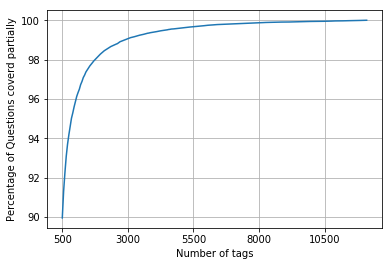

with  5500 tags we are covering  99.067 % of questions
with  500 tags we are covering  89.95 % of questions


In [37]:
fig, ax = plt.subplots()
ax.plot(questions_explained)
xlabel = list(500+np.array(range(-50,450,50))*50)
ax.set_xticklabels(xlabel)
plt.xlabel("Number of tags")
plt.ylabel("Percentage of Questions coverd partially")
plt.grid()
plt.show()
# you can choose any number of tags based on your computing power, minimun is 500(it covers 90% of the tags)
print("with ",5500,"tags we are covering ",questions_explained[50],"% of questions")
print("with ",500,"tags we are covering ",questions_explained[0],"% of questions")

In [38]:
multilabel_yx = tags_to_choose(500)
print("number of questions that are not covered :", questions_explained_fn(500),"out of ", total_qs)

number of questions that are not covered : 20099 out of  200000


In [39]:
print("Number of tags in sample :", multilabel_y.shape[1])
print("number of tags taken :", multilabel_yx.shape[1],"(",(multilabel_yx.shape[1]/multilabel_y.shape[1])*100,"%)")

Number of tags in sample : 23719
number of tags taken : 500 ( 2.108014671782116 %)


#### We consider top 2.1% tags which covers  90% of the questions 

<h2>4.2 Split the data into test and train (80:20) </h2>

There are no time stamps given. So this is not time based splitting. Here we are doing random splitting.

In [40]:
x_train=preprocessed_data.head(train_datasize)
x_test=preprocessed_data.tail(preprocessed_data.shape[0] - 160000)

y_train = multilabel_yx[0:train_datasize,:]
y_test = multilabel_yx[train_datasize:preprocessed_data.shape[0],:]

In [41]:
print("Number of data points in train data :", y_train.shape)
print("Number of data points in test data :", y_test.shape)

Number of data points in train data : (160000, 500)
Number of data points in test data : (40000, 500)


<h2>4.3 Featurizing data using BoW </h2>

1. BoW is one of the popular representations of representing the text(processed text) into vectors. Here only title and body are the text and code is eliminated from this. 
2. Tags are binary vectors.

In [42]:
# https://medium.com/@rnbrown/more-nlp-with-sklearns-countvectorizer-add577a0b8c8
# max features is The CountVectorizer will choose the words/features that occur most frequently to be in its’ vocabulary 
# and drop everything else.

start = datetime.now()
vectorizer = CountVectorizer(min_df=0.00009, max_features=40000, tokenizer = lambda x: x.split(), ngram_range=(1,4))
x_train_multilabel = vectorizer.fit_transform(x_train['question'])
x_test_multilabel = vectorizer.transform(x_test['question'])
print("Time taken to run this cell :", datetime.now() - start)

Time taken to run this cell : 0:04:26.057133


In [43]:
print("Dimensions of train data X:",x_train_multilabel.shape, "Y :",y_train.shape)
print("Dimensions of test data X:",x_test_multilabel.shape,"Y:",y_test.shape)

Dimensions of train data X: (160000, 40000) Y : (160000, 500)
Dimensions of test data X: (40000, 40000) Y: (40000, 500)


## Applying Logistic Regression with SGDClassifier (loss='log') with OneVsRest Classifier 

1. Here we are using Logistic Regression model as training is cheap compared to complex models like SVM, RF, GBDT.
2. As there is high dimensional data, logistic regression performs very well. RF, GBDT may not work very well when we have high dimensional data.
3. Here we are using OneVsRestClassifier as it can be used for multi-label setting and multi-class setting. But here in multi-class, the class label becomes the vector.
4. SGDClassifier with log loss is Logistic Regression.

Using 0.2 million questions, 500 tags 

### Hyper parameter Tuning

In [44]:
# Hyper parameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.multiclass import OneVsRestClassifier

parameters = {'estimator__alpha':[0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}
classifier = OneVsRestClassifier(SGDClassifier(loss='log', penalty='l1'))

model = GridSearchCV(estimator = classifier, param_grid=parameters, cv=3, verbose=0, scoring='f1_micro',n_jobs = -1)
model.fit(x_train_multilabel, y_train)

print(model.best_estimator_) 
optimal_alpha = model.best_estimator_.get_params()['estimator__alpha']
print('best alpha value after hyperparameter tuning is : ',optimal_alpha)


OneVsRestClassifier(estimator=SGDClassifier(alpha=0.0001, average=False,
                                            class_weight=None,
                                            early_stopping=False, epsilon=0.1,
                                            eta0=0.0, fit_intercept=True,
                                            l1_ratio=0.15,
                                            learning_rate='optimal', loss='log',
                                            max_iter=1000, n_iter_no_change=5,
                                            n_jobs=None, penalty='l1',
                                            power_t=0.5, random_state=None,
                                            shuffle=True, tol=0.001,
                                            validation_fraction=0.1, verbose=0,
                                            warm_start=False),
                    n_jobs=None)
best alpha value after hyperparameter tuning is :  0.0001


### Model with optimal alpha

In [46]:
start = datetime.now()
clf = OneVsRestClassifier(SGDClassifier(loss='log', alpha=optimal_alpha, penalty='l1'), n_jobs=-1)
clf.fit(x_train_multilabel, y_train)
predictions = clf.predict(x_test_multilabel)

print("Accuracy :",metrics.accuracy_score(y_test, predictions))
print("Hamming loss ",metrics.hamming_loss(y_test,predictions))


precision = precision_score(y_test, predictions, average='micro')
recall = recall_score(y_test, predictions, average='micro')
f1 = f1_score(y_test, predictions, average='micro')
 
print("Micro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))

precision = precision_score(y_test, predictions, average='macro')
recall = recall_score(y_test, predictions, average='macro')
f1 = f1_score(y_test, predictions, average='macro')
 
print("Macro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))

print (metrics.classification_report(y_test, predictions))
print("Time taken to run this cell :", datetime.now() - start)

Accuracy : 0.16095
Hamming loss  0.00369645
Micro-average quality numbers
Precision: 0.4876, Recall: 0.4392, F1-measure: 0.4621
Macro-average quality numbers
Precision: 0.3731, Recall: 0.3605, F1-measure: 0.3594
              precision    recall  f1-score   support

           0       0.53      0.39      0.45      3177
           1       0.67      0.51      0.58      2878
           2       0.71      0.62      0.66      2720
           3       0.60      0.47      0.53      2514
           4       0.83      0.81      0.82      2214
           5       0.77      0.70      0.73      2163
           6       0.64      0.57      0.60      1318
           7       0.75      0.69      0.72      1278
           8       0.61      0.45      0.52      1289
           9       0.62      0.49      0.55      1185
          10       0.72      0.67      0.69      1186
          11       0.39      0.27      0.32      1128
          12       0.30      0.20      0.24      1096
          13       0.50      0.

#### Observation:-

1. The model with SGDClassifier with log loss,  The Micro F1-score is 0.4621 

## Applying Logistic Regression with L1 penalty as it works well with sparse data.

In [47]:
start = datetime.now()
classifier_2 = OneVsRestClassifier(LogisticRegression(penalty='l1'), n_jobs=-1)
classifier_2.fit(x_train_multilabel, y_train)
predictions_2 = classifier_2.predict(x_test_multilabel)
print("Accuracy :",metrics.accuracy_score(y_test, predictions_2))
print("Hamming loss ",metrics.hamming_loss(y_test,predictions_2))


precision = precision_score(y_test, predictions_2, average='micro')
recall = recall_score(y_test, predictions_2, average='micro')
f1 = f1_score(y_test, predictions_2, average='micro')
 
print("Micro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))

precision = precision_score(y_test, predictions_2, average='macro')
recall = recall_score(y_test, predictions_2, average='macro')
f1 = f1_score(y_test, predictions_2, average='macro')
 
print("Macro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))

print (metrics.classification_report(y_test, predictions_2))
print("Time taken to run this cell :", datetime.now() - start)

Accuracy : 0.21365
Hamming loss  0.00318115
Micro-average quality numbers
Precision: 0.5804, Recall: 0.4339, F1-measure: 0.4965
Macro-average quality numbers
Precision: 0.4634, Recall: 0.3554, F1-measure: 0.3981
              precision    recall  f1-score   support

           0       0.55      0.44      0.49      3177
           1       0.68      0.52      0.59      2878
           2       0.74      0.61      0.67      2720
           3       0.63      0.48      0.54      2514
           4       0.91      0.79      0.85      2214
           5       0.79      0.68      0.73      2163
           6       0.71      0.53      0.61      1318
           7       0.82      0.64      0.72      1278
           8       0.63      0.46      0.53      1289
           9       0.65      0.48      0.55      1185
          10       0.78      0.68      0.72      1186
          11       0.41      0.32      0.36      1128
          12       0.34      0.19      0.24      1096
          13       0.51      0.

#### Observation:-

1. When trained Logistic regression in OneVsRestClassifier with l1 regularization, the performance of micro averaged F1-score improved from 0.46 to 0.49, which is better than the F1-score of the model with SGD Classifier and log loss.
2. Precision also improved from the previous model and Recall remained same.
3. Performace improved further after applying Logistic Regession with L1 penalty. 

## Applying Linear SVM with SGDClassifier (loss='hinge') with OneVsRestClassifier

### Hyper parameter Tuning

In [48]:
# Hyper parameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.multiclass import OneVsRestClassifier

parameters = {'estimator__alpha':[0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}
classifier_3 = OneVsRestClassifier(SGDClassifier(loss='hinge', penalty='l1'))

model_3 = GridSearchCV(estimator = classifier_3, param_grid=parameters, cv=3, verbose=0, scoring='f1_micro',n_jobs = -1)
model_3.fit(x_train_multilabel, y_train)

print(model_3.best_estimator_) 
optimal_alpha_3 = model_3.best_estimator_.get_params()['estimator__alpha']
print('best alpha value after hyperparameter tuning is : ',optimal_alpha_3)


OneVsRestClassifier(estimator=SGDClassifier(alpha=0.0001, average=False,
                                            class_weight=None,
                                            early_stopping=False, epsilon=0.1,
                                            eta0=0.0, fit_intercept=True,
                                            l1_ratio=0.15,
                                            learning_rate='optimal',
                                            loss='hinge', max_iter=1000,
                                            n_iter_no_change=5, n_jobs=None,
                                            penalty='l1', power_t=0.5,
                                            random_state=None, shuffle=True,
                                            tol=0.001, validation_fraction=0.1,
                                            verbose=0, warm_start=False),
                    n_jobs=None)
best alpha value after hyperparameter tuning is :  0.0001


### Linear SVM model with optimal alpha

In [49]:
start = datetime.now()
clf_3 = OneVsRestClassifier(SGDClassifier(loss='hinge', alpha=optimal_alpha_3, penalty='l1'), n_jobs=-1)
clf_3.fit(x_train_multilabel, y_train)
predictions_3 = clf_3.predict(x_test_multilabel)

print("Accuracy :",metrics.accuracy_score(y_test, predictions_3))
print("Hamming loss ",metrics.hamming_loss(y_test,predictions_3))


precision = precision_score(y_test, predictions_3, average='micro')
recall = recall_score(y_test, predictions_3, average='micro')
f1 = f1_score(y_test, predictions_3, average='micro')
 
print("Micro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))

precision = precision_score(y_test, predictions_3, average='macro')
recall = recall_score(y_test, predictions_3, average='macro')
f1 = f1_score(y_test, predictions_3, average='macro')
 
print("Macro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))

print (metrics.classification_report(y_test, predictions_3))
print("Time taken to run this cell :", datetime.now() - start)

Accuracy : 0.157775
Hamming loss  0.00378305
Micro-average quality numbers
Precision: 0.4749, Recall: 0.4378, F1-measure: 0.4556
Macro-average quality numbers
Precision: 0.3565, Recall: 0.3578, F1-measure: 0.3496
              precision    recall  f1-score   support

           0       0.54      0.38      0.44      3177
           1       0.68      0.51      0.59      2878
           2       0.71      0.62      0.66      2720
           3       0.60      0.47      0.53      2514
           4       0.81      0.82      0.81      2214
           5       0.75      0.69      0.72      2163
           6       0.64      0.58      0.61      1318
           7       0.72      0.67      0.70      1278
           8       0.58      0.48      0.52      1289
           9       0.58      0.49      0.53      1185
          10       0.71      0.68      0.70      1186
          11       0.39      0.28      0.33      1128
          12       0.33      0.19      0.24      1096
          13       0.48      0

#### Observation:-

1. The model with SGDClassifier(loss='hinge') gave Micro F1-score of 0.455 which is less than the logistic regression model with SGDClassifier(loss=log) . 

## Models Summarization

In [60]:
from pandas import DataFrame
StackOverflow = {'Vectorizer':['BoW', 'BoW','BoW'],
                 'Model':['LR with SGDClassifier with log loss','Logistic Regression','Linear SVM'],
                 'Hyper parameter alpha':['0.0001','','0.0001'],
                 'Micro F1-score':['0.4621','0.4965','0.4556'],
                 'Precision':['0.4876','0.5804','0.4749'],
                 'Recall':['0.4392','0.4339','0.4378']}

In [61]:
Final_conclusions = DataFrame(StackOverflow)
Final_conclusions

,Hyper parameter alpha,Micro F1-score,Model,Precision,Recall,Vectorizer
0,0.0001,0.4621,LR with SGDClassifier with log loss,0.4876,0.4392,BoW
1,,0.4965,Logistic Regression,0.5804,0.4339,BoW
2,0.0001,0.4556,Linear SVM,0.4749,0.4378,BoW


## Conclusions:-

In this assignment, for the given Questions and its descriptions, I have to predict tags for a particular question correctly with high precision and recall.

1. When we have high dimensional data, linear models perform very well. So Logistic Regression works well in this case.
2. Simple Logistic Regression gave high F1-score of 0.496 than the other two models.
3. Random Forests , GBDT, RBF kernel SVM does not work well with high dimensional data , so I tried Linear SVM with SGD Classifier with hinge loss.
4. Linear SVM gave similar F1-score approx same as to the F1-score of model with Logistic Regression using SGD Classifier with log loss.
5. Simple Logistic Regression has high Precision of 0.58 and the other two models have similar precision.
6. Logistic Regression using SGD Classifier with log loss has high Recall of 0.4392 than the other two models.
7. So, overall Simple Logistic Regression is working well out of 3 models.